In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = np.loadtxt("Boston-Training-Data.csv",delimiter=",")

In [7]:
X = data[:,0:13]
Y = data[:,13]

In [8]:
X.shape,Y.shape

((379, 13), (379,))

In [9]:
X_ = np.append(X,np.ones(X.shape[0]).reshape(-1,1),axis=1)

In [10]:
X_.shape

(379, 14)

In [11]:
def cost(X_train,m,Y_train):
    cost_ = 0
    N = X_train.shape[0]
    for i in range(N):
        cost_ += (1/N)*((Y_train[i]-((X_train[i]*m).sum()))**2)
    return cost_

In [12]:
def step_gradient(X_train,Y_train,m,lr):
    
    slope_m = np.zeros(X_train.shape[1])
    N = X_train.shape[0]
    
    for i in range(N):
        slope_m += (2/N)*(Y_train[i]-(m*X_train[i]).sum())*(-X_train[i])
        
    m = m - (lr * slope_m)
    
    return m

In [17]:
def fit(X_train,Y_train,lr=0.001,epochs=100,verbose=False):
    m = np.zeros(X_train.shape[1])
    last_m = m
    cost_array = []
    unit = epochs//100
    for i in range(epochs+1):
        last_m = m
        m = step_gradient(X_train,Y_train,m,lr)
        cost_ = cost(X_train,m,Y_train)
        
        #verbose is used to only show the learning process if required, else it is False by default
        if verbose and i%unit==0:
            print("epoch:",i,"cost:",cost_)
            cost_array.append(cost_)
    
    #To continue the learning loop incase the current epoch and learning parameters doesn't lead to saturation
    cont = input("Do you want to continue?:")
        
    while cont=="y":
        clear_output(wait=True)
        epochs = int(input("Please enter the number of epochs to continue for:"))
        unit = int(input("Please enter the unit point for epochs:"))
        lr_factor = float(input("Please enter the decay factor for the learning rate:"))
        lr*=lr_factor
        for i in range(epochs+1):
            last_m = m
            m = step_gradient(X_train,Y_train,m,lr)
            cost_ = cost(X_train,m,Y_train)
            if verbose and i%unit==0:
                print("epoch:",i,"cost:",cost_)
                cost_array.append(cost_)
        cont = input("Do you want to continue?:")
        
    return m,cost_array

In [14]:
def predict(X_test,m):
    y_pred = []
    for i in range(X_test.shape[0]):
        y_pred.append((X_test[i]*m).sum())
    return np.array(y_pred)

In [15]:
def score(Y_true,Y_pred):
    u = ((Y_true-Y_pred)**2).sum()
    v = ((Y_true-(Y_true.mean()))**2).sum()
    return 1-(u/v)

In [23]:
m, cost_array = fit(X_,Y,epochs=1000,lr=0.1,verbose=True)
print(m)

epoch: 0 cost: 374.24035597919686
epoch: 10 cost: 29.457161634001743
epoch: 20 cost: 24.56315514362143
epoch: 30 cost: 24.028363158977218
epoch: 40 cost: 23.797447675836793
epoch: 50 cost: 23.676545625233352
epoch: 60 cost: 23.607417751606427
epoch: 70 cost: 23.564988825906966
epoch: 80 cost: 23.537363570351094
epoch: 90 cost: 23.51850635541158
epoch: 100 cost: 23.50516504014468
epoch: 110 cost: 23.495479815294544
epoch: 120 cost: 23.488322392561372
epoch: 130 cost: 23.482969340094932
epoch: 140 cost: 23.4789340646946
epoch: 150 cost: 23.47587649070281
epoch: 160 cost: 23.473552020536623
epoch: 170 cost: 23.471781095996505
epoch: 180 cost: 23.470430041747793
epoch: 190 cost: 23.46939840167482
epoch: 200 cost: 23.4686102152913
epoch: 210 cost: 23.46800781264414
epoch: 220 cost: 23.467547295734448
epoch: 230 cost: 23.467195193416188
epoch: 240 cost: 23.466925957124733
epoch: 250 cost: 23.466720072046787
epoch: 260 cost: 23.46656262548747
epoch: 270 cost: 23.46644221830245
epoch: 280 cost

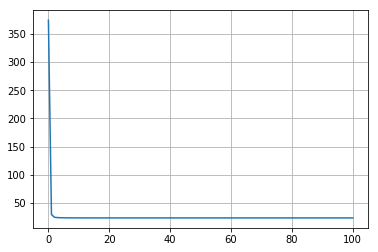

In [26]:
plt.plot(cost_array)
plt.grid()
plt.show()

In [27]:
y_pred = predict(X_,m)
y_pred.shape

(379,)

In [28]:
score(Y,y_pred)

0.7331366627280855

In [29]:
X_test = np.loadtxt("Boston-Testing-Data.csv",delimiter=",")

In [30]:
X_test_ = np.append(X_test,np.ones(X_test.shape[0]).reshape(-1,1),axis=1)

In [31]:
X_test_.shape

(127, 14)

In [36]:
y_pred_test = predict(X_test_,m)

In [37]:
y_pred_test

array([12.43328317, 29.03367208, 22.3716447 , 24.47778566, 20.60167144,
        2.72533226, 30.40000253, 24.86119999, 18.65725021, 23.53985837,
       24.11396868, 17.71143895, 17.44000496, 21.65356361, 42.31137753,
       23.84974576, 24.47573229, 27.53872771, 20.23606771, 31.15155566,
       23.78238082, 25.00979407, 33.95768518, 36.43515607, 32.04098398,
       16.7132256 , 23.47176648, 32.93828177, 25.18069968, 33.71008693,
       16.88580248, 26.02760942, 23.27040054, 25.47758948, 15.00946626,
       29.58574991, 26.24821246, 20.37245804, 24.43681391,  9.44706905,
        8.38096596, 29.01392305, 29.59085454, 19.75757024, 20.3719675 ,
        3.14442593, 39.52420106, 25.71741224, 30.37729444, 16.79453239,
       17.89088614, 41.02574348, 17.57238762, 20.89662705, 15.59837734,
       21.41394829, 18.45436447, 23.155764  , 13.67245063, 17.23573844,
       15.02710402, 29.15131354, 25.17166511, 25.49749371, 17.21186634,
       17.42936975, 34.70372744, 17.01340773, 27.10724189, 22.54

In [38]:
np.savetxt('pred.csv',y_pred_test)